# International Portfolio Analysis
### Introduction

The main goal of this project is to create and evaluate a unique and diversified portfolio for investment, considering the same weight for each asset, including both brazillian and american Stocks/REITs, and compare to 3 differents benchmarks, looking the Risk-Return value of each portfolio:

- S&P 500
- DJI
- IBOVESPA

The comparison is made using the Return and the Risk of each of these index and the Diversified Portfolio. The Risk of the diversified portfolio is calculated using the Modern Portfolio Theory, created by Harry Markowitz. The risk of each benchmark is assumed as the standard deviation of the returns. The Risk-Return of the portfolio and the indexes are obtained using the Sharp Ratio concept.

Markowitz’s assumptions are:

1) Investors are rational (risk-averse) and will always behave in a certain manner, maximizing return and minimizing the risk;
2) Investors will accept increased risk only if compensated with higher expected returns;
3) Investors receive all pertinent information regarding their investment decision in a timely manner.
4) Investors can borrow or lend an unlimited amount of capital at a risk-free rate of interest.

This resolution is guided by CRISP-DM method, which has the step-by-step process to solve this problem. This method has 6 phases, each of these phases are detailed in the topics bellow. 

1) Business understanding – What does the business need?
2) Data understanding – What data do we have / need? Is it clean?
3) Data preparation – How do we organize the data for modeling?
4) Modeling – What modeling techniques should we apply?
5) Evaluation – Which model best meets the business objectives?
6) Deployment – How do stakeholders access the results?

This study will comprehend the steps from 1 to 5, using the Modern Theory showed before.

Ps.: these portfolios are not a recommendation for any investment, they are used only for study purpose.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import seaborn as sns
import plotly.express as px
from bcb import sgs
from datetime import date


# 1) Business understanding – What does the business need?

In the last years it's observed the importance of establish a solid and valuable portfolio of investiments, to assure the famous financial freedom. This concept is the base of a sustainable financial life, which encourage people to save some part of the income and build a solid wealth for the retirement.

On the other hand, it's also observed that the economies around the world have different types of Risk and also Returns of it's assets, depending on the developing level of the economy.

So, it's important to evaluate how the interface between local assets and international assets change the Sharpe Ratio of the portfolio, to build a solid and valuable one.

# 2) Data understanding – What data do we have / need? Is it clean?

All the data that will be used in this study comes from yahoo finance library and all the treatments made using pandas, numpy and matplotlib libraries. The getting and cleaning process will be discussed bellow. 

# Getting the index prices

ibov_price = yf.download("BOVA11.SA", start="2013-01-01", end="2022-12-31")
sp500_price = yf.download("^GSPC", start="2013-01-01", end="2022-12-31")
dji_price = yf.download("^dji", start="2013-01-01", end="2022-12-31")

display(ibov_price, sp500_price, dji_price)

# Converting the DFs to csv

ibov_price.to_csv('ibov_price.csv')
sp500_price.to_csv('sp500_price.csv')
dji_price.to_csv('dji_price.csv')


In [2]:
# Exploring data

ibov_price = pd.read_csv('ibov_price.csv')
sp500_price = pd.read_csv('sp500_price.csv')
dji_price = pd.read_csv('dji_price.csv')

display(ibov_price.head(), sp500_price.head(), dji_price.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02 00:00:00-02:00,60.810001,61.680000,60.810001,61.270000,61.270000,3128520
1,2013-01-03 00:00:00-02:00,61.259998,62.209999,61.130001,61.919998,61.919998,1461210
2,2013-01-04 00:00:00-02:00,61.889999,62.009998,61.160000,61.320000,61.320000,1216790
3,2013-01-07 00:00:00-02:00,61.410000,61.470001,60.439999,60.750000,60.750000,1095410
4,2013-01-08 00:00:00-02:00,60.750000,61.009998,59.869999,59.910000,59.910000,1532920


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02 00:00:00-05:00,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000
1,2013-01-03 00:00:00-05:00,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000
2,2013-01-04 00:00:00-05:00,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000
3,2013-01-07 00:00:00-05:00,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000
4,2013-01-08 00:00:00-05:00,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02 00:00:00-05:00,13104.299805,13412.709961,13104.299805,13412.549805,13412.549805,161430000
1,2013-01-03 00:00:00-05:00,13413.009766,13430.599609,13358.299805,13391.360352,13391.360352,129630000
2,2013-01-04 00:00:00-05:00,13391.049805,13447.110352,13376.230469,13435.209961,13435.209961,107590000
3,2013-01-07 00:00:00-05:00,13436.129883,13436.129883,13343.320312,13384.290039,13384.290039,113120000
4,2013-01-08 00:00:00-05:00,13377.419922,13377.419922,13293.129883,13328.849609,13328.849609,129570000


In [3]:
# The first step is remove the hour stamp and set the date for index

# Importing and Cleaning data

ibov_price = pd.read_csv('ibov_price.csv')
sp500_price = pd.read_csv('sp500_price.csv')
dji_price = pd.read_csv('dji_price.csv')

# Removing the hour and minutes of the Date column

ibov_price['Date'] = ibov_price['Date'].str.split().str[0]
ibov_price['Date'] = pd.to_datetime(ibov_price['Date'])

sp500_price['Date'] = sp500_price['Date'].str.split().str[0]
sp500_price['Date'] = pd.to_datetime(sp500_price['Date'])

dji_price['Date'] = dji_price['Date'].str.split().str[0]
dji_price['Date'] = pd.to_datetime(dji_price['Date'])

ibov_price = ibov_price.set_index('Date')
sp500_price = sp500_price.set_index('Date')
dji_price = dji_price.set_index('Date')

# Dropping unusual columns:
ibov_price = ibov_price.drop(columns=['Open', 'High','Low','Close','Volume'])
sp500_price = sp500_price.drop(columns=['Open', 'High','Low','Close','Volume'])
dji_price = dji_price.drop(columns=['Open', 'High','Low','Close','Volume'])

ibov_price.info()
sp500_price.info()
dji_price.info()

display(ibov_price.head(), sp500_price.head(), dji_price.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2013-01-02 to 2022-12-29
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2484 non-null   float64
dtypes: float64(1)
memory usage: 38.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2518 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2518 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


,Adj Close
Date,
2013-01-02,61.270000
2013-01-03,61.919998
2013-01-04,61.320000
2013-01-07,60.750000
2013-01-08,59.910000


,Adj Close
Date,
2013-01-02,1462.420044
2013-01-03,1459.369995
2013-01-04,1466.469971
2013-01-07,1461.890015
2013-01-08,1457.150024


,Adj Close
Date,
2013-01-02,13412.549805
2013-01-03,13391.360352
2013-01-04,13435.209961
2013-01-07,13384.290039
2013-01-08,13328.849609


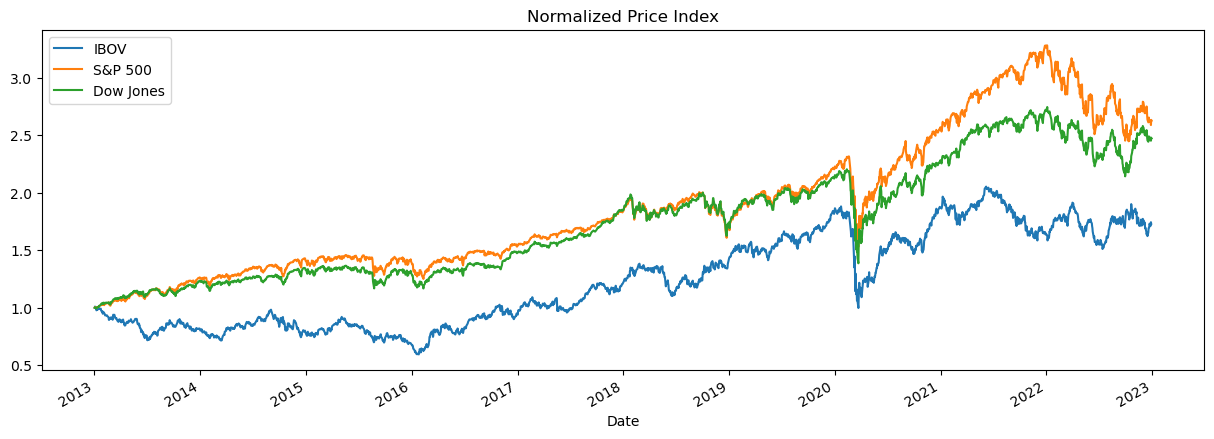

In [4]:
# Plotting the normalized index prices

ibov_price_norm = ibov_price/ibov_price.iloc[0]
sp500_price_norm = sp500_price/sp500_price.iloc[0]
dji_price_norm = dji_price/dji_price.iloc[0]

ibov_price_norm['Adj Close'].plot(figsize=(15,5), label = 'IBOV')
sp500_price_norm['Adj Close'].plot(figsize=(15,5), label = 'S&P 500')
dji_price_norm['Adj Close'].plot(figsize=(15,5), label = 'Dow Jones')
plt.title('Normalized Price Index')
plt.legend()
plt.show()

# Importing BR Portfolio

br_ticker = pd.read_excel('PORTFOLIO_BR.xlsx')

br_portfolio = pd.DataFrame()

for ticker in br_ticker['Ticker']:
    br_portfolio[ticker] = yf.download(f"{ticker}.SA", start="2013-01-01", end="2022-12-31")['Adj Close']
    
display(br_portfolio)

# Importing US Portfolio

us_ticker = pd.read_excel('PORTFOLIO_US.xlsx')

us_portfolio = pd.DataFrame()

for ticker in us_ticker['Ticker']:
    us_portfolio[ticker] = yf.download(f"{ticker}", start="2013-01-01", end="2022-12-31")['Adj Close']


# Converting the DFs to csv

br_portfolio.to_csv('br_portfolio.csv')
us_portfolio.to_csv('us_portfolio.csv')


In [5]:
# Exploring data

br_portfolio = pd.read_csv('br_portfolio.csv')
us_portfolio = pd.read_csv('us_portfolio.csv')

display(br_portfolio.head(), us_portfolio.head())

,Date,ITUB3,TOTS3,MDIA3,FLRY3,ENBR3,EGIE3,GRND3,RADL3,PSSA3,...,XPIN11,VRTA11,BTLG11,VILG11,ALZR11,VINO11,XPLG11,BCRI11,RECR11,VISC11
0,2013-01-02 00:00:00-02:00,8.959285,11.462108,21.477108,7.459641,6.924201,13.944240,3.387081,4.272284,6.303160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-03 00:00:00-02:00,9.198208,11.439731,21.477108,7.393480,6.870442,14.090409,3.321111,4.254102,6.383286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-04 00:00:00-02:00,9.385927,11.160028,21.795797,7.310778,6.477998,13.806428,3.360281,4.199562,6.409994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-07 00:00:00-02:00,9.536667,11.157234,22.031355,7.310778,6.241457,13.489039,3.463358,4.181382,6.369930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-08 00:00:00-02:00,9.582176,11.229954,21.962078,7.261157,6.182323,13.363750,3.473664,4.181382,6.540863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
0,2013-01-02 00:00:00-05:00,18.099348,50.752052,51.432915,18.509552,53.958744,7.851383,36.226868,38.340000,59.009605,...,28.721060,26.349571,11.648089,54.787762,10.914546,100.834549,12.269526,39.931309,75.792015,170.090591
1,2013-01-03 00:00:00-05:00,18.109859,50.608154,51.106796,18.567598,53.882584,7.888535,36.254848,37.750000,58.774612,...,28.784201,25.940947,11.734373,53.693485,10.824544,100.461853,12.091371,40.151073,75.201920,167.796432
2,2013-01-04 00:00:00-05:00,18.467718,50.512203,51.210567,18.590813,54.499577,7.859638,36.550938,38.130001,59.217472,...,28.933043,26.356161,11.820653,53.649712,10.920547,100.924263,12.207562,40.297577,75.684067,170.288376
3,2013-01-07 00:00:00-05:00,18.387136,50.240395,50.862183,18.505678,54.385303,7.830743,36.812057,37.939999,58.819820,...,28.716549,26.237532,11.825446,53.080669,11.016553,100.737938,12.075879,40.114445,76.072693,173.072968
4,2013-01-08 00:00:00-05:00,18.350851,50.544193,50.780655,18.405067,54.392918,7.583068,37.154793,38.139999,58.169071,...,28.743612,26.151844,11.849417,53.015003,11.136558,100.054634,12.168830,39.740845,75.396233,170.248795


In [6]:
# Importing and cleaning data

br_portfolio = pd.read_csv('br_portfolio.csv')
us_portfolio = pd.read_csv('us_portfolio.csv')

# Removing the hour and minutes of the Date column

br_portfolio['Date'] = br_portfolio['Date'].str.split().str[0]
br_portfolio['Date'] = pd.to_datetime(br_portfolio['Date'])

us_portfolio['Date'] = us_portfolio['Date'].str.split().str[0]
us_portfolio['Date'] = pd.to_datetime(us_portfolio['Date'])

# Dropping unneeded columns, that has a few ammount of data

br_portfolio = br_portfolio.drop(columns = [
    'XPML11','HGRU11','XPIN11','VILG11','ALZR11','VINO11','XPLG11','BCRI11','RECR11','VISC11'
, 'KNRI11', 'VRTA11', 'BTLG11']
                 , axis = 1)

br_portfolio = br_portfolio.set_index('Date')
us_portfolio = us_portfolio.set_index('Date')

br_portfolio.info()
us_portfolio.info()

display(br_portfolio, us_portfolio)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2013-01-02 to 2022-12-29
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB3   2484 non-null   float64
 1   TOTS3   2484 non-null   float64
 2   MDIA3   2484 non-null   float64
 3   FLRY3   2484 non-null   float64
 4   ENBR3   2484 non-null   float64
 5   EGIE3   2484 non-null   float64
 6   GRND3   2484 non-null   float64
 7   RADL3   2484 non-null   float64
 8   PSSA3   2484 non-null   float64
 9   ODPV3   2484 non-null   float64
 10  EZTC3   2484 non-null   float64
 11  BBDC3   2484 non-null   float64
 12  LREN3   2484 non-null   float64
 13  ARZZ3   2484 non-null   float64
 14  LEVE3   2484 non-null   float64
 15  ABEV3   2484 non-null   float64
 16  EQTL3   2484 non-null   float64
 17  WEGE3   2484 non-null   float64
 18  HGLG11  2484 non-null   float64
 19  HGRE11  2484 non-null   float64
dtypes: float64(20)
memory usage: 407.5 KB
<class 'pandas.cor

,ITUB3,TOTS3,MDIA3,FLRY3,ENBR3,EGIE3,GRND3,RADL3,PSSA3,ODPV3,EZTC3,BBDC3,LREN3,ARZZ3,LEVE3,ABEV3,EQTL3,WEGE3,HGLG11,HGRE11
Date,,,,,,,,,,,,,,,,,,,,
2013-01-02,8.959285,11.462108,21.477108,7.459641,6.924201,13.944240,3.387081,4.272284,6.303160,7.944602,12.337477,8.133438,10.944885,31.135183,14.951386,11.399805,3.152814,3.449262,115.826111,166.733963
2013-01-03,9.198208,11.439731,21.477108,7.393480,6.870442,14.090409,3.321111,4.254102,6.383286,8.088923,12.388705,8.580062,10.965322,31.017544,14.905169,11.601918,3.200558,3.603706,115.826111,166.176636
2013-01-04,9.385927,11.160028,21.795797,7.310778,6.477998,13.806428,3.360281,4.199562,6.409994,7.944602,12.435286,8.559188,10.951702,31.213619,14.899388,11.410654,3.032628,3.560807,117.454910,166.083755
2013-01-07,9.536667,11.157234,22.031355,7.310778,6.241457,13.489039,3.463358,4.181382,6.369930,8.153863,12.202413,8.357445,10.765083,31.331242,15.072702,11.542236,2.963480,3.517904,116.731010,166.269547
2013-01-08,9.582176,11.229954,21.962078,7.261157,6.182323,13.363750,3.473664,4.181382,6.540863,7.966252,12.295557,8.329620,10.707874,29.927427,14.789625,11.528668,2.930552,3.376943,117.454910,165.805099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,21.842375,28.134451,37.049999,15.780000,19.667988,38.090000,6.730000,23.879999,22.889999,9.040000,13.970000,12.815220,21.879999,80.849998,29.360977,14.620000,26.969999,38.500000,160.820068,121.355003
2022-12-26,21.562599,26.844334,36.189999,15.490000,19.601925,37.759998,6.590000,23.750000,22.510000,8.890000,13.670000,12.517861,20.709999,78.559998,29.847408,14.520000,26.309999,38.189999,161.796829,121.295540
2022-12-27,21.362761,26.556540,35.810001,15.700000,19.252733,37.560001,6.270000,23.639999,22.860001,8.980000,13.110000,12.594600,20.379999,76.570000,29.584736,14.520000,26.370001,38.009998,162.043488,121.216255


,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,18.099348,50.752052,51.432915,18.509552,53.958744,7.851383,36.226868,38.340000,59.009605,301.059998,...,28.721060,26.349571,11.648089,54.787762,10.914546,100.834549,12.269526,39.931309,75.792015,170.090591
2013-01-03,18.109859,50.608154,51.106796,18.567598,53.882584,7.888535,36.254848,37.750000,58.774612,300.950012,...,28.784201,25.940947,11.734373,53.693485,10.824544,100.461853,12.091371,40.151073,75.201920,167.796432
2013-01-04,18.467718,50.512203,51.210567,18.590813,54.499577,7.859638,36.550938,38.130001,59.217472,300.179993,...,28.933043,26.356161,11.820653,53.649712,10.920547,100.924263,12.207562,40.297577,75.684067,170.288376
2013-01-07,18.387136,50.240395,50.862183,18.505678,54.385303,7.830743,36.812057,37.939999,58.819820,299.589996,...,28.716549,26.237532,11.825446,53.080669,11.016553,100.737938,12.075879,40.114445,76.072693,173.072968
2013-01-08,18.350851,50.544193,50.780655,18.405067,54.392918,7.583068,37.154793,38.139999,58.169071,297.760010,...,28.743612,26.151844,11.849417,53.015003,11.136558,100.054634,12.168830,39.740845,75.396233,170.248795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,89.230003,318.730011,151.668274,47.759998,177.479996,26.875189,205.830002,338.450012,236.320007,1412.359985,...,98.717361,93.760002,28.379999,136.979996,34.959999,283.209991,57.059357,147.590256,101.258835,657.679993
2022-12-27,87.389999,319.549988,152.989975,47.490002,177.429993,27.004637,206.289993,335.089996,237.610001,1398.000000,...,98.984222,93.769997,28.200001,136.929993,35.560001,283.040009,56.751568,146.975586,101.436935,654.580017
2022-12-28,86.019997,315.730011,151.012405,46.840000,176.660004,26.685997,204.990005,328.329987,235.119995,1378.280029,...,97.274361,93.500000,27.670000,134.860001,33.750000,277.989990,55.579998,144.160004,99.606483,652.539978


# Scrap USD - BRL conversion price

usd_brl = yf.download('USDBRL=X', start="2013-01-01", end="2022-12-31")['Adj Close']

usd_brl.to_csv('usd_brl.csv')


In [7]:
# Exploring data

usd_brl = pd.read_csv('usd_brl.csv')

display(usd_brl.head())

,Date,Adj Close
0,2013-01-01 00:00:00+00:00,2.0507
1,2013-01-02 00:00:00+00:00,2.0456
2,2013-01-03 00:00:00+00:00,2.0456
3,2013-01-04 00:00:00+00:00,2.0487
4,2013-01-07 00:00:00+00:00,2.0324


In [8]:
# Importing and Cleaning data

usd_brl = pd.read_csv('usd_brl.csv')

# Removing the hour and minutes of the Date column

usd_brl['Date'] = usd_brl['Date'].str.split().str[0]
usd_brl['Date'] = pd.to_datetime(usd_brl['Date'])

# Normalizing USD-BRL conversion price

usd_brl = usd_brl.set_index('Date')

usd_brl_norm = usd_brl / usd_brl.iloc[0]

usd_brl_norm = usd_brl_norm.reset_index()

usd_brl_norm = usd_brl_norm.rename(columns={'Adj Close': 'USD - BRL'})

usd_brl = usd_brl.rename(columns={'Adj Close': 'USD - BRL'})

usd_brl_norm = usd_brl_norm.set_index('Date')

display(usd_brl, usd_brl_norm)

,USD - BRL
Date,
2013-01-01,2.0507
2013-01-02,2.0456
2013-01-03,2.0456
2013-01-04,2.0487
2013-01-07,2.0324
...,...
2022-12-26,5.1643
2022-12-27,5.2175
2022-12-28,5.2923


,USD - BRL
Date,
2013-01-01,1.000000
2013-01-02,0.997513
2013-01-03,0.997513
2013-01-04,0.999025
2013-01-07,0.991076
...,...
2022-12-26,2.518311
2022-12-27,2.544253
2022-12-28,2.580729


# 3) Data preparation – How do we organize the data for modeling?

All the collected data from the past 10 years of index and assets prices are now cleaned.

Now it's necessary to conduce the normalizing process to standardize all this data.

After this, it's also necessary to merge the portfolios, to create a unique and global portfolio.

In [9]:
# US portfolio with USD-BRL column added

us_portfolio_brl = pd.merge_ordered(us_portfolio,usd_brl, on='Date', fill_method='ffill').dropna()

us_portfolio_brl = us_portfolio_brl.set_index('Date')

display(us_portfolio_brl)

,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX,USD - BRL
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,18.099348,50.752052,51.432915,18.509552,53.958744,7.851383,36.226868,38.340000,59.009605,301.059998,...,26.349571,11.648089,54.787762,10.914546,100.834549,12.269526,39.931309,75.792015,170.090591,2.0456
2013-01-03,18.109859,50.608154,51.106796,18.567598,53.882584,7.888535,36.254848,37.750000,58.774612,300.950012,...,25.940947,11.734373,53.693485,10.824544,100.461853,12.091371,40.151073,75.201920,167.796432,2.0456
2013-01-04,18.467718,50.512203,51.210567,18.590813,54.499577,7.859638,36.550938,38.130001,59.217472,300.179993,...,26.356161,11.820653,53.649712,10.920547,100.924263,12.207562,40.297577,75.684067,170.288376,2.0487
2013-01-07,18.387136,50.240395,50.862183,18.505678,54.385303,7.830743,36.812057,37.939999,58.819820,299.589996,...,26.237532,11.825446,53.080669,11.016553,100.737938,12.075879,40.114445,76.072693,173.072968,2.0324
2013-01-08,18.350851,50.544193,50.780655,18.405067,54.392918,7.583068,37.154793,38.139999,58.169071,297.760010,...,26.151844,11.849417,53.015003,11.136558,100.054634,12.168830,39.740845,75.396233,170.248795,2.0264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,89.230003,318.730011,151.668274,47.759998,177.479996,26.875189,205.830002,338.450012,236.320007,1412.359985,...,93.760002,28.379999,136.979996,34.959999,283.209991,57.059357,147.590256,101.258835,657.679993,5.1643
2022-12-27,87.389999,319.549988,152.989975,47.490002,177.429993,27.004637,206.289993,335.089996,237.610001,1398.000000,...,93.769997,28.200001,136.929993,35.560001,283.040009,56.751568,146.975586,101.436935,654.580017,5.2175
2022-12-28,86.019997,315.730011,151.012405,46.840000,176.660004,26.685997,204.990005,328.329987,235.119995,1378.280029,...,93.500000,27.670000,134.860001,33.750000,277.989990,55.579998,144.160004,99.606483,652.539978,5.2923


In [10]:
# Convert the USD prices to BRL for the US portfolio

us_portfolio_brl_converted = us_portfolio_brl.mul(us_portfolio_brl['USD - BRL'], axis=0)
us_portfolio_brl_converted.drop(columns='USD - BRL', inplace=True)

display(us_portfolio_brl_converted)

,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,37.024025,103.818395,105.211167,37.863138,110.378003,16.060788,74.105678,78.428302,120.710045,615.848312,...,58.751798,53.900681,23.827331,112.073842,22.326795,206.267147,25.098543,81.683483,155.040141,347.937303
2013-01-03,37.045527,103.524037,104.544059,37.981878,110.222210,16.136786,74.162916,77.221398,120.229344,615.623326,...,58.880959,53.064799,24.003833,109.835390,22.142686,205.504760,24.734107,82.133033,153.833042,343.244372
2013-01-04,37.834816,103.484355,104.915094,38.087000,111.653288,16.102041,74.881909,78.116937,121.318841,614.978779,...,59.275127,53.995870,24.216973,109.912169,22.372927,206.763547,25.009634,82.557650,155.053955,348.869812
2013-01-07,37.370014,102.108573,103.372294,37.610938,110.532685,15.915202,74.816822,77.109249,119.545397,608.886676,...,58.363511,53.325157,24.034035,107.881147,22.390041,204.739774,24.543015,81.528593,154.610133,351.753481
2013-01-08,37.186166,102.422758,102.901924,37.296030,110.221813,15.366329,75.290475,77.286898,117.873811,603.380910,...,58.246059,52.994099,24.011659,107.429607,22.567121,202.750719,24.658918,80.530851,152.782932,344.992172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,460.810503,1646.017385,783.260462,246.646958,916.559936,138.791537,1062.967871,1747.857386,1220.427406,7293.850623,...,509.806066,484.204776,146.562829,707.405787,180.543922,1462.581349,294.671634,762.200353,522.930997,3396.456763
2022-12-27,455.957340,1667.252128,798.225227,247.779094,925.741024,140.896698,1076.318083,1748.332126,1239.730228,7294.065293,...,516.450201,489.244977,147.133510,714.432266,185.534315,1476.761304,296.101317,766.845150,529.247232,3415.271377
2022-12-28,455.243648,1670.938008,799.202987,247.891343,934.937777,141.230308,1084.868652,1737.620862,1244.325603,7294.271708,...,514.805121,494.830071,146.437948,713.719611,178.615133,1471.206488,294.146036,762.938020,527.147415,3453.437472


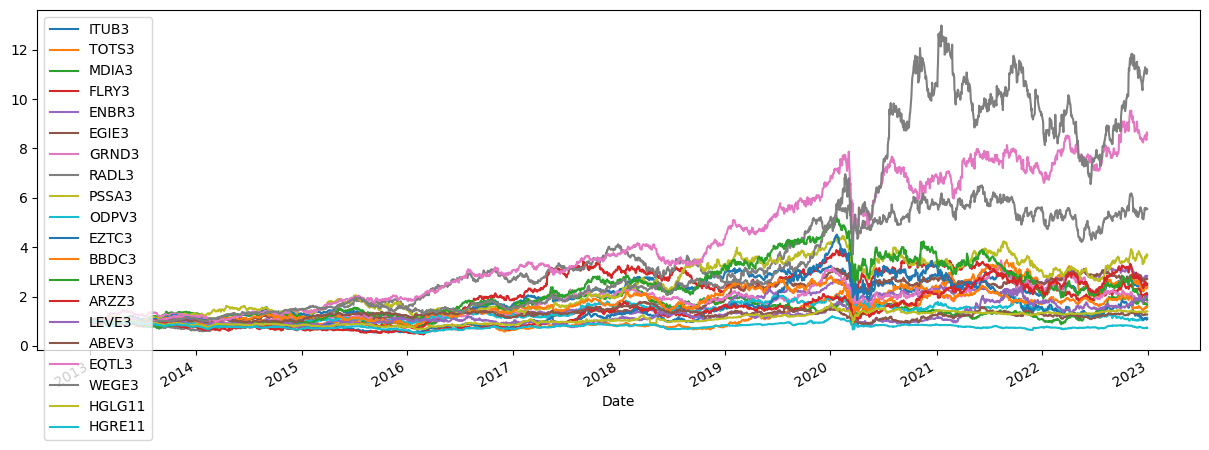

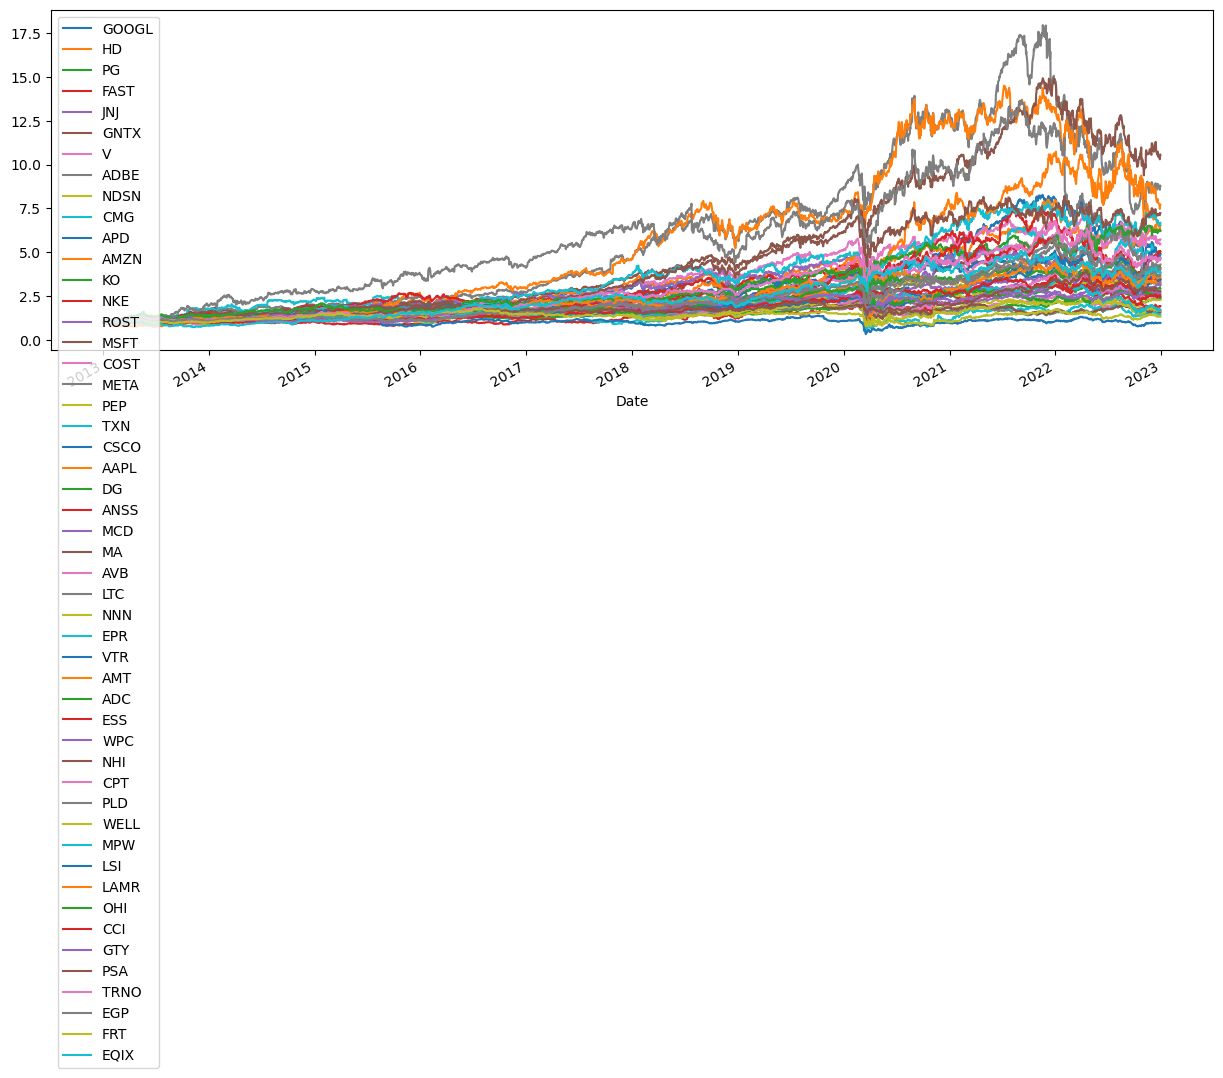

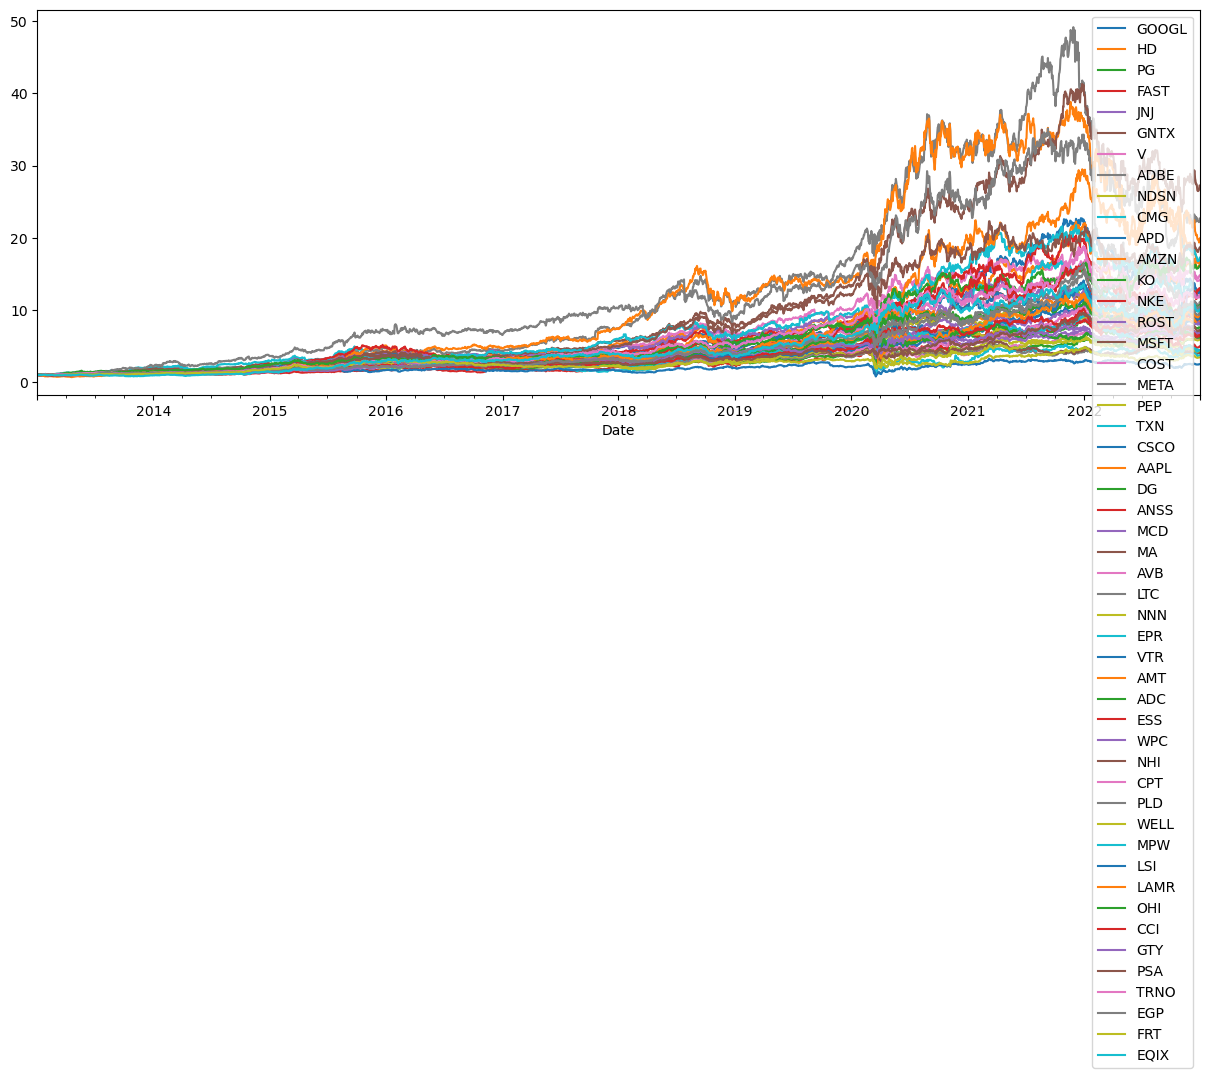

In [11]:
#Normalizing BR, US-USD and US-BRL portfolios

br_portfolio_norm = br_portfolio/br_portfolio.iloc[0]
us_portfolio_norm = us_portfolio/us_portfolio.iloc[0]
us_portfolio_brl_converted_norm = us_portfolio_brl_converted/us_portfolio_brl_converted.iloc[0]

br_portfolio_norm.plot(figsize=(15,5))
us_portfolio_norm.plot(figsize=(15,5))
us_portfolio_brl_converted_norm.plot(figsize=(15,5))
plt.legend(loc='upper right')
plt.show()

In [12]:
# Visualization of the BR, US-USD and US-BRL portfolios data

display(br_portfolio_norm, us_portfolio_norm, us_portfolio_brl_converted_norm)

,ITUB3,TOTS3,MDIA3,FLRY3,ENBR3,EGIE3,GRND3,RADL3,PSSA3,ODPV3,EZTC3,BBDC3,LREN3,ARZZ3,LEVE3,ABEV3,EQTL3,WEGE3,HGLG11,HGRE11
Date,,,,,,,,,,,,,,,,,,,,
2013-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2013-01-03,1.026668,0.998048,1.000000,0.991131,0.992236,1.010482,0.980523,0.995744,1.012712,1.018166,1.004152,1.054912,1.001867,0.996222,0.996909,1.017730,1.015143,1.044776,1.000000,0.996657
2013-01-04,1.047620,0.973645,1.014839,0.980044,0.935559,0.990117,0.992088,0.982978,1.016949,1.000000,1.007928,1.052346,1.000623,1.002519,0.996522,1.000952,0.961880,1.032339,1.014062,0.996100
2013-01-07,1.064445,0.973402,1.025806,0.980044,0.901398,0.967356,1.022520,0.978723,1.010593,1.026340,0.989053,1.027541,0.983572,1.006297,1.008114,1.012494,0.939948,1.019900,1.007813,0.997215
2013-01-08,1.069525,0.979746,1.022581,0.973392,0.892857,0.958371,1.025563,0.978723,1.037712,1.002725,0.996602,1.024120,0.978345,0.961209,0.989181,1.011304,0.929504,0.979033,1.014062,0.994429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,2.437960,2.454562,1.725093,2.115383,2.840471,2.731594,1.986962,5.589516,3.631512,1.137880,1.132322,1.575621,1.999107,2.596741,1.963763,1.282478,8.554264,11.161809,1.388461,0.727836
2022-12-26,2.406732,2.342007,1.685050,2.076507,2.830930,2.707928,1.945628,5.559088,3.571225,1.118999,1.108006,1.539061,1.892208,2.523190,1.996297,1.273706,8.344927,11.071934,1.396894,0.727479
2022-12-27,2.384427,2.316898,1.667357,2.104659,2.780499,2.693585,1.851151,5.533340,3.626753,1.130327,1.062616,1.548496,1.862057,2.459276,1.978729,1.273706,8.363958,11.019749,1.399024,0.727004


,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2013-01-03,1.000581,0.997165,0.993659,1.003136,0.998589,1.004732,1.000772,0.984611,0.996018,0.999635,...,1.002198,0.984492,1.007408,0.980027,0.991754,0.996304,0.985480,1.005504,0.992214,0.986512
2013-01-04,1.020353,0.995274,0.995677,1.004390,1.010023,1.001051,1.008946,0.994523,1.003523,0.997077,...,1.007381,1.000250,1.014815,0.979228,1.000550,1.000890,0.994950,1.009172,0.998576,1.001163
2013-01-07,1.015900,0.989918,0.988903,0.999791,1.007905,0.997371,1.016153,0.989567,0.996784,0.995117,...,0.999843,0.995748,1.015226,0.968842,1.009346,0.999042,0.984217,1.004586,1.003703,1.017534
2013-01-08,1.013896,0.995904,0.987318,0.994355,1.008046,0.965826,1.025614,0.994783,0.985756,0.989039,...,1.000785,0.992496,1.017284,0.967643,1.020341,0.992265,0.991793,0.995230,0.994778,1.000930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,4.930012,6.280140,2.948856,2.580289,3.289180,3.422988,5.681695,8.827595,4.004772,4.691291,...,3.437107,3.558312,2.436451,2.500193,3.203065,2.808660,4.650494,3.696104,1.336009,3.866645
2022-12-27,4.828351,6.296297,2.974554,2.565702,3.288253,3.439475,5.694392,8.739958,4.026633,4.643593,...,3.446399,3.558692,2.420998,2.499281,3.258038,2.806975,4.625408,3.680710,1.338359,3.848420
2022-12-28,4.752657,6.221029,2.936104,2.530585,3.273983,3.398891,5.658508,8.563641,3.984436,4.578091,...,3.386865,3.548445,2.375497,2.461499,3.092204,2.756892,4.529922,3.610200,1.314208,3.836426


,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2013-01-03,1.000581,0.997165,0.993659,1.003136,0.998589,1.004732,1.000772,0.984611,0.996018,0.999635,...,1.002198,0.984492,1.007408,0.980027,0.991754,0.996304,0.985480,1.005504,0.992214,0.986512
2013-01-04,1.021899,0.996782,0.997186,1.005912,1.011554,1.002569,1.010475,0.996030,1.005043,0.998588,...,1.008907,1.001766,1.016353,0.980712,1.002066,1.002407,0.996458,1.010702,1.000089,1.002680
2013-01-07,1.009345,0.983531,0.982522,0.993339,1.001401,0.990935,1.009596,0.983181,0.990352,0.988696,...,0.993391,0.989322,1.008675,0.962590,1.002833,0.992595,0.977866,0.998104,0.997226,1.010968
2013-01-08,1.004379,0.986557,0.978051,0.985022,0.998585,0.956761,1.015988,0.985447,0.976504,0.979756,...,0.991392,0.983181,1.007736,0.958561,1.010764,0.982952,0.982484,0.985889,0.985441,0.991535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,12.446256,15.854776,7.444651,6.514171,8.303828,8.641639,14.343946,22.286054,10.110405,11.843583,...,8.677284,8.983277,6.151038,6.311962,8.086424,7.090714,11.740587,9.331144,3.372875,9.761692
2022-12-27,12.315175,16.059313,7.586887,6.544072,8.387006,8.772714,14.524097,22.292107,10.270315,11.843932,...,8.790373,9.076787,6.174989,6.374657,8.309940,7.159460,11.797550,9.388008,3.413614,9.815767
2022-12-28,12.295898,16.094816,7.596180,6.547036,8.470327,8.793486,14.639481,22.155533,10.308385,11.844267,...,8.762372,9.180405,6.145797,6.368298,8.000035,7.132529,11.719646,9.340175,3.400071,9.925459


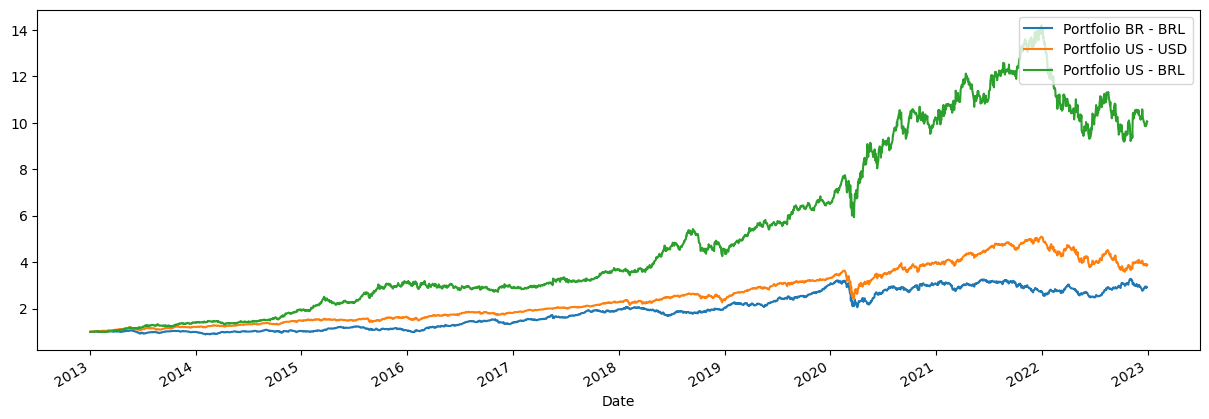

,Portfolio BR - BRL
Date,
2013-01-02,1.000000
2013-01-03,1.007704
2013-01-04,0.999956
2013-01-07,0.997129
2013-01-08,0.990949
...,...
2022-12-23,2.951667
2022-12-26,2.905890
2022-12-27,2.889181


,Portfolio US - USD
Date,
2013-01-02,1.000000
2013-01-03,0.998780
2013-01-04,1.003491
2013-01-07,1.003767
2013-01-08,1.001701
...,...
2022-12-23,3.906347
2022-12-27,3.895746
2022-12-28,3.839894


,Portfolio US - BRL
Date,
2013-01-02,1.000000
2013-01-03,0.998780
2013-01-04,1.005012
2013-01-07,0.997290
2013-01-08,0.992299
...,...
2022-12-26,9.861923
2022-12-27,9.936476
2022-12-28,9.934432


In [13]:
# Grouping all the assets presented in the portfolios, with the same weight 

br_portfolio_norm_total = pd.DataFrame()
br_portfolio_norm_total['Portfolio BR - BRL'] = br_portfolio_norm.sum(axis = 1)
br_portfolio_norm_total = br_portfolio_norm_total / br_portfolio_norm_total.iloc[0]

us_portfolio_norm_total = pd.DataFrame()
us_portfolio_norm_total['Portfolio US - USD'] = us_portfolio_norm.sum(axis = 1)
us_portfolio_norm_total = us_portfolio_norm_total / us_portfolio_norm_total.iloc[0]

us_portfolio_brl_converted_norm_total = pd.DataFrame()
us_portfolio_brl_converted_norm_total['Portfolio US - BRL'] = us_portfolio_brl_converted_norm.sum(axis = 1)
us_portfolio_brl_converted_norm_total = us_portfolio_brl_converted_norm_total / us_portfolio_brl_converted_norm_total.iloc[0]

br_portfolio_norm_total['Portfolio BR - BRL'].plot(figsize=(15,5))
us_portfolio_norm_total['Portfolio US - USD'].plot(figsize=(15,5))
us_portfolio_brl_converted_norm_total['Portfolio US - BRL'].plot(figsize=(15,5))
plt.legend(loc='upper right')
plt.show()

display(br_portfolio_norm_total)
display(us_portfolio_norm_total)
display(us_portfolio_brl_converted_norm_total)


In [14]:
## Grouping the US-BRL and BR-BRL Portfolios, to create a unique and diversified portfolio,
# excluding the weight of each asset.

merged_portfolio = pd.merge_ordered(br_portfolio_norm_total,
                                    us_portfolio_brl_converted_norm_total, 
                                    on='Date', 
                                    fill_method='ffill'
                                   )

merged_portfolio['Global Portfolio'] = merged_portfolio['Portfolio BR - BRL'] + merged_portfolio['Portfolio US - BRL']

merged_portfolio = merged_portfolio.set_index('Date')

# Normalizing the merged portfolio and cleaning the Data Frame

merged_portfolio_norm = merged_portfolio/merged_portfolio.iloc[0]

merged_portfolio_norm.drop(columns=['Portfolio BR - BRL','Portfolio US - BRL'], inplace=True)

merged_portfolio_norm.info()
display(merged_portfolio_norm)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2608 entries, 2013-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Global Portfolio  2608 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


,Global Portfolio
Date,
2013-01-02,1.000000
2013-01-03,1.003242
2013-01-04,1.002484
2013-01-07,0.997209
2013-01-08,0.991624
...,...
2022-12-26,6.383906
2022-12-27,6.412828
2022-12-28,6.441578


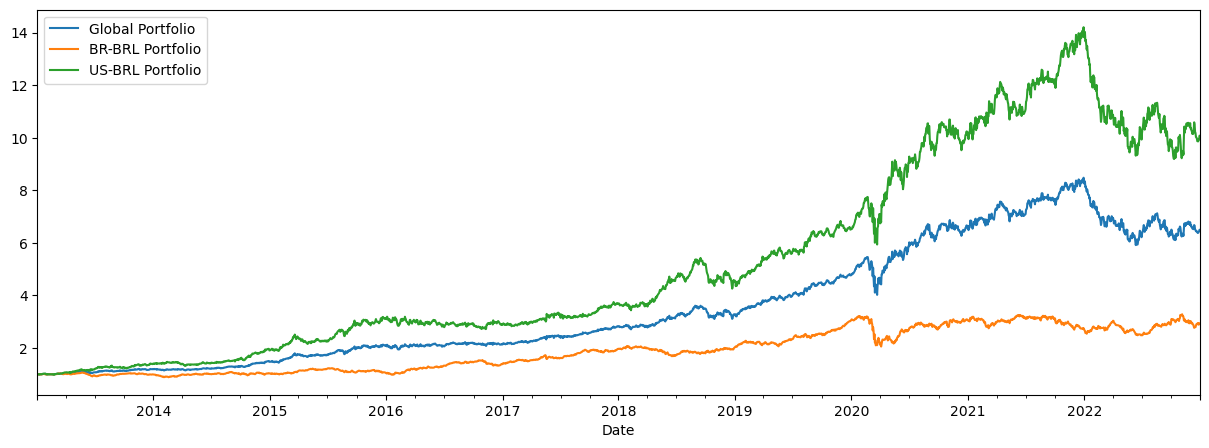

In [15]:
## Comparing the return between US-BRL, BR-BRL and the Global Portfolio.

merged_portfolio_norm['Global Portfolio'].plot(figsize=(15,5), label = 'Global Portfolio')
br_portfolio_norm_total['Portfolio BR - BRL'].plot(figsize=(15,5), label = 'BR-BRL Portfolio')
us_portfolio_brl_converted_norm_total['Portfolio US - BRL'].plot(figsize=(15,5), label = 'US-BRL Portfolio')
plt.legend(loc='upper left')
plt.show()

# 4) Modeling – What modeling techniques should we apply?

To apply the Modern Portfolio Theory of Markowitz, it's necessary to calculate the daily return of each portfolio. Then, with this information, it's possible to calculate the covariance of each portfolio. Finally, with all this information, the risk of each portfolio will be calculated as shown by the theory:

FORMULA MARKOWITZ RISCO PORTFOLIO



In [16]:
# Daily Return for all portfolios, including the US-BRL converted return

br_portfolio_return = br_portfolio.pct_change().dropna()
us_portfolio_return = us_portfolio.pct_change().dropna()
us_portfolio_brl_converted_return = us_portfolio_brl_converted.pct_change().dropna()

br_portfolio_return_pct = br_portfolio_return.applymap(lambda x: '{:.2%}'.format(x))
us_portfolio_return_pct = us_portfolio_return.applymap(lambda x: '{:.2%}'.format(x))
us_portfolio_brl_converted_return_pct = us_portfolio_brl_converted_return.applymap(lambda x: '{:.2%}'.format(x))

display(br_portfolio_return_pct)
display(us_portfolio_return_pct)
display(us_portfolio_brl_converted_return_pct)

,ITUB3,TOTS3,MDIA3,FLRY3,ENBR3,EGIE3,GRND3,RADL3,PSSA3,ODPV3,EZTC3,BBDC3,LREN3,ARZZ3,LEVE3,ABEV3,EQTL3,WEGE3,HGLG11,HGRE11
Date,,,,,,,,,,,,,,,,,,,,
2013-01-03,2.67%,-0.20%,0.00%,-0.89%,-0.78%,1.05%,-1.95%,-0.43%,1.27%,1.82%,0.42%,5.49%,0.19%,-0.38%,-0.31%,1.77%,1.51%,4.48%,0.00%,-0.33%
2013-01-04,2.04%,-2.45%,1.48%,-1.12%,-5.71%,-2.02%,1.18%,-1.28%,0.42%,-1.78%,0.38%,-0.24%,-0.12%,0.63%,-0.04%,-1.65%,-5.25%,-1.19%,1.41%,-0.06%
2013-01-07,1.61%,-0.03%,1.08%,0.00%,-3.65%,-2.30%,3.07%,-0.43%,-0.63%,2.63%,-1.87%,-2.36%,-1.70%,0.38%,1.16%,1.15%,-2.28%,-1.20%,-0.62%,0.11%
2013-01-08,0.48%,0.65%,-0.31%,-0.68%,-0.95%,-0.93%,0.30%,0.00%,2.68%,-2.30%,0.76%,-0.33%,-0.53%,-4.48%,-1.88%,-0.12%,-1.11%,-4.01%,0.62%,-0.28%
2013-01-09,3.15%,0.30%,2.08%,1.59%,2.17%,5.16%,0.18%,0.65%,-3.88%,1.63%,-1.52%,2.23%,2.07%,3.64%,1.17%,1.54%,5.56%,0.76%,0.00%,-0.28%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1.34%,1.47%,-0.51%,2.40%,1.51%,0.54%,2.28%,1.32%,0.31%,1.92%,2.95%,1.37%,6.91%,5.04%,3.60%,1.39%,0.30%,-1.13%,1.88%,0.00%
2022-12-26,-1.28%,-4.59%,-2.32%,-1.84%,-0.34%,-0.87%,-2.08%,-0.54%,-1.66%,-1.66%,-2.15%,-2.32%,-5.35%,-2.83%,1.66%,-0.68%,-2.45%,-0.81%,0.61%,-0.05%
2022-12-27,-0.93%,-1.07%,-1.05%,1.36%,-1.78%,-0.53%,-4.86%,-0.46%,1.55%,1.01%,-4.10%,0.61%,-1.59%,-2.53%,-0.88%,0.00%,0.23%,-0.47%,0.15%,-0.07%


,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,0.06%,-0.28%,-0.63%,0.31%,-0.14%,0.47%,0.08%,-1.54%,-0.40%,-0.04%,...,0.22%,-1.55%,0.74%,-2.00%,-0.82%,-0.37%,-1.45%,0.55%,-0.78%,-1.35%
2013-01-04,1.98%,-0.19%,0.20%,0.13%,1.15%,-0.37%,0.82%,1.01%,0.75%,-0.26%,...,0.52%,1.60%,0.74%,-0.08%,0.89%,0.46%,0.96%,0.36%,0.64%,1.49%
2013-01-07,-0.44%,-0.54%,-0.68%,-0.46%,-0.21%,-0.37%,0.71%,-0.50%,-0.67%,-0.20%,...,-0.75%,-0.45%,0.04%,-1.06%,0.88%,-0.18%,-1.08%,-0.45%,0.51%,1.64%
2013-01-08,-0.20%,0.60%,-0.16%,-0.54%,0.01%,-3.16%,0.93%,0.53%,-1.11%,-0.61%,...,0.09%,-0.33%,0.20%,-0.12%,1.09%,-0.68%,0.77%,-0.93%,-0.89%,-1.63%
2013-01-09,0.66%,-0.08%,0.54%,-0.02%,0.45%,0.05%,1.52%,1.36%,1.69%,-1.25%,...,0.89%,0.66%,0.08%,-0.11%,0.92%,0.37%,-0.57%,0.33%,0.35%,1.22%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1.68%,0.83%,0.28%,0.15%,0.25%,0.93%,0.38%,0.57%,0.70%,0.32%,...,1.36%,0.64%,1.00%,1.02%,1.39%,1.15%,1.04%,0.75%,1.08%,0.40%
2022-12-27,-2.06%,0.26%,0.87%,-0.57%,-0.03%,0.48%,0.22%,-0.99%,0.55%,-1.02%,...,0.27%,0.01%,-0.63%,-0.04%,1.72%,-0.06%,-0.54%,-0.42%,0.18%,-0.47%
2022-12-28,-1.57%,-1.20%,-1.29%,-1.37%,-0.43%,-1.18%,-0.63%,-2.02%,-1.05%,-1.41%,...,-1.73%,-0.29%,-1.88%,-1.51%,-5.09%,-1.78%,-2.06%,-1.92%,-1.80%,-0.31%


,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,0.06%,-0.28%,-0.63%,0.31%,-0.14%,0.47%,0.08%,-1.54%,-0.40%,-0.04%,...,0.22%,-1.55%,0.74%,-2.00%,-0.82%,-0.37%,-1.45%,0.55%,-0.78%,-1.35%
2013-01-04,2.13%,-0.04%,0.35%,0.28%,1.30%,-0.22%,0.97%,1.16%,0.91%,-0.10%,...,0.67%,1.75%,0.89%,0.07%,1.04%,0.61%,1.11%,0.52%,0.79%,1.64%
2013-01-07,-1.23%,-1.33%,-1.47%,-1.25%,-1.00%,-1.16%,-0.09%,-1.29%,-1.46%,-0.99%,...,-1.54%,-1.24%,-0.76%,-1.85%,0.08%,-0.98%,-1.87%,-1.25%,-0.29%,0.83%
2013-01-08,-0.49%,0.31%,-0.46%,-0.84%,-0.28%,-3.45%,0.63%,0.23%,-1.40%,-0.90%,...,-0.20%,-0.62%,-0.09%,-0.42%,0.79%,-0.97%,0.47%,-1.22%,-1.18%,-1.92%
2013-01-09,1.34%,0.60%,1.22%,0.65%,1.13%,0.73%,2.21%,2.05%,2.38%,-0.59%,...,1.58%,1.34%,0.76%,0.57%,1.60%,1.04%,0.10%,1.01%,1.03%,1.91%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,...,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%,-0.03%
2022-12-27,-1.05%,1.29%,1.91%,0.46%,1.00%,1.52%,1.26%,0.03%,1.58%,0.00%,...,1.30%,1.04%,0.39%,0.99%,2.76%,0.97%,0.49%,0.61%,1.21%,0.55%
2022-12-28,-0.16%,0.22%,0.12%,0.05%,0.99%,0.24%,0.79%,-0.61%,0.37%,0.00%,...,-0.32%,1.14%,-0.47%,-0.10%,-3.73%,-0.38%,-0.66%,-0.51%,-0.40%,1.12%


In [17]:
# Exploring the descriptive stats for both portfolios

display(br_portfolio_return.describe())
display(us_portfolio_return.describe())
display(us_portfolio_brl_converted_return.describe())

,ITUB3,TOTS3,MDIA3,FLRY3,ENBR3,EGIE3,GRND3,RADL3,PSSA3,ODPV3,EZTC3,BBDC3,LREN3,ARZZ3,LEVE3,ABEV3,EQTL3,WEGE3,HGLG11,HGRE11
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000
mean,0.000542,0.000628,0.000435,0.000503,0.000607,0.000522,0.000443,0.000884,0.000718,0.000243,0.000405,0.000429,0.000533,0.000683,0.000514,0.000241,0.001010,0.001189,0.000232,-0.000046
std,0.019072,0.023516,0.021454,0.020474,0.019356,0.015455,0.020525,0.019651,0.019735,0.019542,0.027269,0.021997,0.023670,0.024968,0.021688,0.016898,0.017016,0.020775,0.013801,0.012606
min,-0.200718,-0.153436,-0.192503,-0.152542,-0.127682,-0.096286,-0.111628,-0.128348,-0.118087,-0.111184,-0.193284,-0.160127,-0.211201,-0.166667,-0.113216,-0.157818,-0.108411,-0.206197,-0.192759,-0.177700
25%,-0.009837,-0.012084,-0.010798,-0.011041,-0.010210,-0.008336,-0.010932,-0.011040,-0.010895,-0.010858,-0.014862,-0.011981,-0.012614,-0.013143,-0.011326,-0.008553,-0.008858,-0.010311,-0.004534,-0.005507
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000208,0.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000360,0.000000,0.000000,0.000807,0.000549,0.000000,0.000000
75%,0.010529,0.013413,0.011322,0.011251,0.011267,0.009017,0.011400,0.012695,0.012468,0.011766,0.015025,0.012087,0.013098,0.014065,0.012097,0.009432,0.010823,0.012039,0.004901,0.005135
max,0.117472,0.197996,0.244186,0.160969,0.155556,0.099225,0.100719,0.092486,0.100038,0.111029,0.253613,0.163276,0.150000,0.166193,0.145354,0.098712,0.083916,0.138944,0.188034,0.105678


,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,0.000774,0.000839,0.000493,0.000514,0.000533,0.000630,0.000820,0.001061,0.000711,0.000846,...,0.000602,0.000726,0.000577,0.000469,0.000596,0.000500,0.000717,0.000650,0.000272,0.000677
std,0.017055,0.014943,0.011539,0.016830,0.011137,0.016526,0.015864,0.019860,0.017738,0.022004,...,0.015215,0.020937,0.021722,0.014766,0.017025,0.013637,0.014646,0.015985,0.017863,0.016817
min,-0.116341,-0.197939,-0.087373,-0.110217,-0.100379,-0.101944,-0.135472,-0.167932,-0.183091,-0.145822,...,-0.197491,-0.248818,-0.282748,-0.124250,-0.234361,-0.115312,-0.141575,-0.208906,-0.213542,-0.126648
25%,-0.006928,-0.005651,-0.004799,-0.007427,-0.004500,-0.008116,-0.006809,-0.007396,-0.007340,-0.009112,...,-0.006692,-0.007123,-0.007262,-0.006710,-0.006128,-0.006570,-0.006387,-0.006573,-0.006987,-0.008143
50%,0.000784,0.001014,0.000633,0.000573,0.000529,0.000985,0.001308,0.001331,0.000707,0.000531,...,0.000931,0.000735,0.001542,0.000656,0.000575,0.000878,0.000633,0.001201,0.000766,0.000935
75%,0.008994,0.008009,0.006071,0.009066,0.006050,0.009506,0.008601,0.010549,0.009174,0.010356,...,0.008866,0.008518,0.009508,0.007636,0.007861,0.007730,0.008397,0.007947,0.007690,0.009658
max,0.162584,0.137508,0.120090,0.171502,0.079977,0.120097,0.138427,0.177193,0.196964,0.244404,...,0.104986,0.262914,0.497647,0.113395,0.241936,0.063612,0.115436,0.200065,0.329029,0.116020


,GOOGL,HD,PG,FAST,JNJ,GNTX,V,ADBE,NDSN,CMG,...,LSI,LAMR,OHI,CCI,GTY,PSA,TRNO,EGP,FRT,EQIX
count,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,...,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000
mean,0.001170,0.001237,0.000903,0.000919,0.000939,0.001036,0.001218,0.001453,0.001110,0.001239,...,0.001001,0.001125,0.000973,0.000874,0.000994,0.000905,0.001112,0.001049,0.000682,0.001080
std,0.019975,0.018510,0.015957,0.019807,0.015517,0.019787,0.019184,0.022618,0.020582,0.024183,...,0.018325,0.023378,0.023798,0.018020,0.019757,0.017253,0.017849,0.019063,0.020450,0.019967
min,-0.104830,-0.187491,-0.090163,-0.111919,-0.091836,-0.095608,-0.124210,-0.172277,-0.172449,-0.143656,...,-0.187037,-0.239033,-0.273405,-0.112842,-0.232723,-0.103787,-0.130393,-0.198601,-0.211858,-0.115271
25%,-0.009862,-0.008487,-0.007963,-0.009789,-0.007577,-0.010060,-0.008879,-0.010161,-0.009544,-0.011079,...,-0.008992,-0.009081,-0.009662,-0.009161,-0.008725,-0.008505,-0.008837,-0.008780,-0.009382,-0.010248
50%,0.000801,0.001013,0.000293,0.000404,0.000379,0.001055,0.000797,0.001287,0.000699,0.000573,...,0.000777,0.000420,0.001336,0.000785,0.000703,0.000482,0.000746,0.000621,0.000481,0.000637
75%,0.011622,0.010583,0.009000,0.011711,0.009238,0.012320,0.011267,0.013472,0.011539,0.013051,...,0.010872,0.010468,0.011350,0.010501,0.010273,0.010472,0.011113,0.010628,0.010166,0.012045
max,0.168146,0.159197,0.122647,0.171531,0.106826,0.139961,0.160132,0.171422,0.219786,0.247774,...,0.126055,0.286993,0.525826,0.113982,0.265615,0.092926,0.109968,0.194181,0.290362,0.137299


In [18]:
# Simple Avarege Annual Return for IBOV, S&P 500 and DJI indexes,
# disconsidering the weight of each asset

ibov_price_return = pd.DataFrame()
ibov_price_return['IBOV'] = ibov_price['Adj Close']
ibov_price_return = ibov_price_return.pct_change().dropna()

sp500_price_return = pd.DataFrame()
sp500_price_return['S&P 500'] = sp500_price['Adj Close']
sp500_price_return = sp500_price_return.pct_change().dropna()

dji_price_return = pd.DataFrame()
dji_price_return['DJI'] = dji_price['Adj Close']
dji_price_return = dji_price_return.pct_change().dropna()

# Annual Returns
aar_ibov_price_return = ibov_price_return.mean()*252
aar_sp500_price_return = sp500_price_return.mean()*252
aar_dji_price_return = dji_price_return.mean()*252

# Calculating the weight of each index
col_index = ibov_price_return.shape[1]
weight_index = [1]*col_index
weight_index= pd.DataFrame({'Weights - Index': weight_index})

ibov_price_return_weight = np.dot(aar_ibov_price_return, weight_index)
ibov_price_return_weight = ibov_price_return_weight.item()

sp500_price_return_weight = np.dot(aar_sp500_price_return, weight_index)
sp500_price_return_weight = sp500_price_return_weight.item()

dji_price_return_weight = np.dot(aar_dji_price_return, weight_index)
dji_price_return_weight = dji_price_return_weight.item()

print('The Simple Avarege Annual Return for IBOV is: {:.2%}.'.format(ibov_price_return_weight))
print('The Simple Avarege Annual Return for S&P 500 is: {:.2%}.'.format(sp500_price_return_weight))
print('The Simple Avarege Annual Return for DJI is: {:.2%}.'.format(dji_price_return_weight))

The Simple Avarege Annual Return for IBOV is: 8.83%.
The Simple Avarege Annual Return for S&P 500 is: 11.22%.
The Simple Avarege Annual Return for DJI is: 10.58%.


In [19]:
# Simple Avarege Annual Return for US - BRL and BR - BRL portfolios,
# disconsidering the weight of each asset

# Annual Returns
aar_br_portfolio_return = br_portfolio_return.mean()*252 
aar_us_portfolio_brl_converted_return = us_portfolio_brl_converted_return.mean()*252

# Calculating the weight of each asset, distributing it equally
col_br_portfolio_return = br_portfolio_return.shape[1]
col_us_portfolio_brl_converted_return = us_portfolio_brl_converted_return.shape[1]

weight_br = [1/col_br_portfolio_return]*col_br_portfolio_return
weight_us = [1/col_us_portfolio_brl_converted_return]*col_us_portfolio_brl_converted_return

weight_br = pd.DataFrame({'Weights - BR': weight_br})
weight_us = pd.DataFrame({'Weights - US': weight_us})

# Annual Returns, multiplying the return with the weight of each asset
aar_br_portfolio_return_weight = np.dot(aar_br_portfolio_return, weight_br)
aar_br_portfolio_return_weight = aar_br_portfolio_return_weight[0]

aar_us_portfolio_brl_converted_return_weight = np.dot(aar_us_portfolio_brl_converted_return, weight_us)
aar_us_portfolio_brl_converted_return_weight = aar_us_portfolio_brl_converted_return[0]

print('The Simple Avarege Annual Return for BR-BRL portfolio is: {:.2%}.'.format(aar_br_portfolio_return_weight))
print('The Simple Avarege Annual Return for US-BRL portfolio is: {:.2%}.'.format(aar_us_portfolio_brl_converted_return_weight))


The Simple Avarege Annual Return for BR-BRL portfolio is: 13.50%.
The Simple Avarege Annual Return for US-BRL portfolio is: 29.50%.


In [20]:
# Simple Avarege Annual Return for the Global Portfolio, disconsidering the weight of each asset.

global_portfolio_return = pd.merge_ordered(br_portfolio_return,
                                           us_portfolio_brl_converted_return,
                                           on='Date',
                                           fill_method='ffill'
                                          )

global_portfolio_return.set_index('Date', inplace=True)

# Calculating the Annual Return for the Global Portfolio
aar_global_portfolio_return = global_portfolio_return.mean()*252

# Calculating the weight of each asset, distributing it equally
col_aar_global_portfolio_return = global_portfolio_return.shape[1]

weight_global = [1/col_aar_global_portfolio_return]*col_aar_global_portfolio_return

weight_global = pd.DataFrame({'Weights - global - BRL': weight_global})

# Annual Returns, multiplying the return with the weight of each asset

aar_global_portfolio_return_weight = np.dot(aar_global_portfolio_return, weight_global)
aar_global_portfolio_return_weight = aar_global_portfolio_return_weight[0]

print('The Simple Avarege Annual Return for global-BRL portfolio is: {:.2%}.'.format(aar_global_portfolio_return_weight))

The Simple Avarege Annual Return for global-BRL portfolio is: 22.76%.


In [21]:
# Comparison of the Annual Risk between the US-BRL, BR-BRL and global-BRL portfolios, disconsidering the weight of each asset.
# Considering the Annual Risk based on the Modern Portfolio Theory of Markowitz

cov_br_portfolio = br_portfolio_return.cov()
cov_us_portfolio = us_portfolio_brl_converted_return.cov()
cov_global_portfolio = global_portfolio_return.cov()

risk_br_portfolio = np.sqrt(np.dot(weight_br.T, np.dot(cov_br_portfolio, weight_br)))*np.sqrt(252)
risk_br_portfolio = risk_br_portfolio.item()

risk_us_portfolio = np.sqrt(np.dot(weight_us.T, np.dot(cov_us_portfolio, weight_us)))*np.sqrt(252)
risk_us_portfolio = risk_us_portfolio.item()

risk_global_portfolio = np.sqrt(np.dot(weight_global.T, np.dot(cov_global_portfolio, weight_global)))*np.sqrt(252)
risk_global_portfolio = risk_global_portfolio.item()

print('The annual risk of the BR-BRL portfolio is: {:.2%}.'.format(risk_br_portfolio))
print('The annual risk of the US-BRL portfolio is: {:.2%}.'.format(risk_us_portfolio))
print('The annual risk of the global-BRL portfolio is: {:.2%}.'.format(risk_global_portfolio))

The annual risk of the BR-BRL portfolio is: 18.72%.
The annual risk of the US-BRL portfolio is: 24.55%.
The annual risk of the global-BRL portfolio is: 19.89%.


In [22]:
# Comparison of the Annual Risk between the IBOV, S&P 500 and DJI indexes, 
# disconsidering the weight of each asset.

# Considering the Annual Risk based on the Modern Portfolio Theory of Markowitz

risk_IBOV_portfolio = ibov_price_return.std().item()*np.sqrt(252)

risk_SP500_portfolio = sp500_price_return.std().item()*np.sqrt(252)

risk_DJI_portfolio = dji_price_return.std().item()*np.sqrt(252)

print('The annual risk of IBOV is: {:.2%}.'.format(risk_IBOV_portfolio))
print('The annual risk of S&P 500 is: {:.2%}.'.format(risk_SP500_portfolio))
print('The annual risk of DJI is: {:.2%}.'.format(risk_DJI_portfolio))

The annual risk of IBOV is: 25.51%.
The annual risk of S&P 500 is: 17.58%.
The annual risk of DJI is: 17.41%.


In [23]:
print('The Simple Avarege Annual Return for BR-BRL portfolio is: {:.2%}.'.format(aar_br_portfolio_return_weight))
print('The Simple Avarege Annual Return for US-BRL portfolio is: {:.2%}.'.format(aar_us_portfolio_brl_converted_return_weight))
print('The Simple Avarege Annual Return for global-BRL portfolio is: {:.2%}.'.format(aar_global_portfolio_return_weight))

print('The annual risk of the BR-BRL portfolio is: {:.2%}.'.format(risk_br_portfolio))
print('The annual risk of the US-BRL portfolio is: {:.2%}.'.format(risk_us_portfolio))
print('The annual risk of the global-BRL portfolio is: {:.2%}.'.format(risk_global_portfolio))

print('The Simple Avarege Annual Return for IBOV is: {:.2%}.'.format(ibov_price_return_weight))
print('The Simple Avarege Annual Return for S&P 500 is: {:.2%}.'.format(sp500_price_return_weight))
print('The Simple Avarege Annual Return for DJI is: {:.2%}.'.format(dji_price_return_weight))

print('The annual risk of IBOV is: {:.2%}.'.format(risk_IBOV_portfolio))
print('The annual risk of S&P 500 is: {:.2%}.'.format(risk_SP500_portfolio))
print('The annual risk of DJI is: {:.2%}.'.format(risk_DJI_portfolio))

The Simple Avarege Annual Return for BR-BRL portfolio is: 13.50%.
The Simple Avarege Annual Return for US-BRL portfolio is: 29.50%.
The Simple Avarege Annual Return for global-BRL portfolio is: 22.76%.
The annual risk of the BR-BRL portfolio is: 18.72%.
The annual risk of the US-BRL portfolio is: 24.55%.
The annual risk of the global-BRL portfolio is: 19.89%.
The Simple Avarege Annual Return for IBOV is: 8.83%.
The Simple Avarege Annual Return for S&P 500 is: 11.22%.
The Simple Avarege Annual Return for DJI is: 10.58%.
The annual risk of IBOV is: 25.51%.
The annual risk of S&P 500 is: 17.58%.
The annual risk of DJI is: 17.41%.


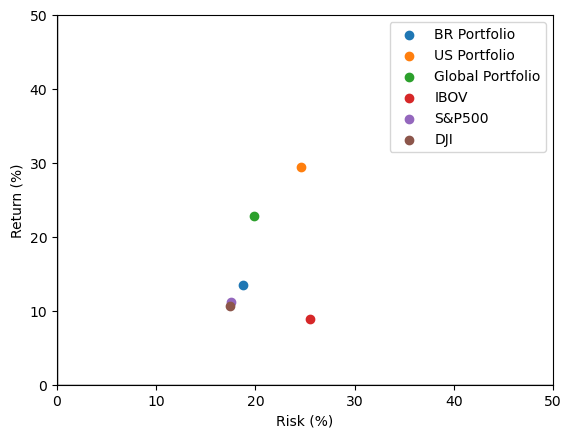

In [24]:
# Plotting the results of Return and Risk of each portfolio

y = [
    aar_br_portfolio_return_weight, aar_us_portfolio_brl_converted_return_weight, 
    aar_global_portfolio_return_weight, ibov_price_return_weight,sp500_price_return_weight, dji_price_return_weight
    ]

x = [
    risk_br_portfolio, risk_us_portfolio, risk_global_portfolio, 
    risk_IBOV_portfolio, risk_SP500_portfolio, risk_DJI_portfolio
    ]

y = [i * 100 for i in y]
x = [i * 100 for i in x]

color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
labels=['BR Portfolio','US Portfolio','Global Portfolio','IBOV','S&P500','DJI']

# Plot
fig, ax = plt.subplots()
for i in range(len(x)):
    ax.scatter(x[i], y[i],label=labels[i])

# Adding lines
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

# Configuration
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.set_xlabel('Risk (%)')
ax.set_ylabel('Return (%)')

ax.legend()
plt.show()

# 4 and 5 Modeling/Evaluation – What modeling techniques should we apply?

As showed before, to estimate precisely the interface between risk and return of each portfolio it's necessary to calculate the Sharp Ratio.
The Sharp Ratio includes 3 variables, 2 of them are already estimated:

FORMULA DO SHARP RATIO

- Rp is the return obtained by the portfolio
- Rf is the return obtained by a Risk Free investiment. In Brazil it's common to use the Selic Rate for it.
- σp is the risk of the portfolio

The Rf variable will be web scrapped.

The higher Sharp Ratio indicates a better investiment, because it has a good relationship between higher return and lower risk.

# Scrapping the Avarage Risk Free Annual Return for Brazil

br_rf = sgs.get(('selic', 432), start="2013-01-01", end="2022-12-31")


# Converting the DFs to csv

br_rf.to_csv('br_rf.csv')


In [25]:
# Exploring data

br_rf = pd.read_csv('br_rf.csv')

br_rf = br_rf.set_index('Date')

br_rf_mean = br_rf.mean().item()/100

print('The avarage annual return for the risk free is: {:.2%}.'.format(br_rf_mean))

The avarage annual return for the risk free is: 8.96%.


# Scrapping the Avarage Risk Free Annual Return for US

us_rf = yf.download("^TNX", start="2013-01-01", end="2022-12-31")['Adj Close']


# Converting the DFs to csv

us_rf.to_csv('us_rf.csv')

In [26]:
# Exploring the US Risk Free date

us_rf = pd.read_csv('us_rf.csv')

display(us_rf)
us_rf.info()

,Date,Adj Close
0,2013-01-02 00:00:00-05:00,1.839
1,2013-01-03 00:00:00-05:00,1.899
2,2013-01-04 00:00:00-05:00,1.915
3,2013-01-07 00:00:00-05:00,1.903
4,2013-01-08 00:00:00-05:00,1.871
...,...,...
2511,2022-12-23 00:00:00-05:00,3.751
2512,2022-12-27 00:00:00-05:00,3.860
2513,2022-12-28 00:00:00-05:00,3.887
2514,2022-12-29 00:00:00-05:00,3.835


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Adj Close  2516 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.4+ KB


In [27]:
# Cleaning the US Risk Free data

us_rf = pd.read_csv('us_rf.csv')

us_rf['US Rf'] = us_rf['Adj Close']

us_rf.drop(columns='Adj Close', inplace=True)

us_rf['Date'] = us_rf['Date'].str.split().str[0]
us_rf['Date'] = pd.to_datetime(us_rf['Date'])

us_rf.set_index('Date', inplace=True)

display(us_rf)

,US Rf
Date,
2013-01-02,1.839
2013-01-03,1.899
2013-01-04,1.915
2013-01-07,1.903
2013-01-08,1.871
...,...
2022-12-23,3.751
2022-12-27,3.860
2022-12-28,3.887


In [28]:
# Calculating the mean US Risk Free rate

us_rf_mean = us_rf.mean().item()/100

print('The avarage annual return for the US risk free is: {:.2%}.'.format(us_rf_mean))


The avarage annual return for the US risk free is: 2.15%.


In [29]:
# Calculating the Sharp Ratio for each portfolio

br_portfolio_sr = (aar_br_portfolio_return_weight - br_rf_mean)/risk_br_portfolio
us_portfolio_brl_converted_sr = (aar_us_portfolio_brl_converted_return_weight - br_rf_mean)/risk_us_portfolio
global_portfolio_sr = (aar_global_portfolio_return_weight - br_rf_mean)/risk_global_portfolio

ibov_sr = (ibov_price_return_weight - br_rf_mean)/risk_IBOV_portfolio
sp500_sr = (sp500_price_return_weight - us_rf_mean)/risk_SP500_portfolio
dji_sr = (dji_price_return_weight - us_rf_mean)/risk_DJI_portfolio

print('The Sharpe Ratio for BR-BRL portfolio is: {:.2}.'.format(br_portfolio_sr))
print('The Sharpe Ratio for US-BRL portfolio is: {:.2}.'.format(us_portfolio_brl_converted_sr))
print('The Sharpe Ratio for Global-BRL portfolio is: {:.2}.'.format(global_portfolio_sr))
print('The Sharpe Ratio for IBOV portfolio is: {:.2}.'.format(ibov_sr))
print('The Sharpe Ratio for S&P 500 portfolio is: {:.2}.'.format(sp500_sr))
print('The Sharpe Ratio for DJI portfolio is: {:.2}.'.format(dji_sr))


The Sharpe Ratio for BR-BRL portfolio is: 0.24.
The Sharpe Ratio for US-BRL portfolio is: 0.84.
The Sharpe Ratio for Global-BRL portfolio is: 0.69.
The Sharpe Ratio for IBOV portfolio is: -0.0051.
The Sharpe Ratio for S&P 500 portfolio is: 0.52.
The Sharpe Ratio for DJI portfolio is: 0.48.


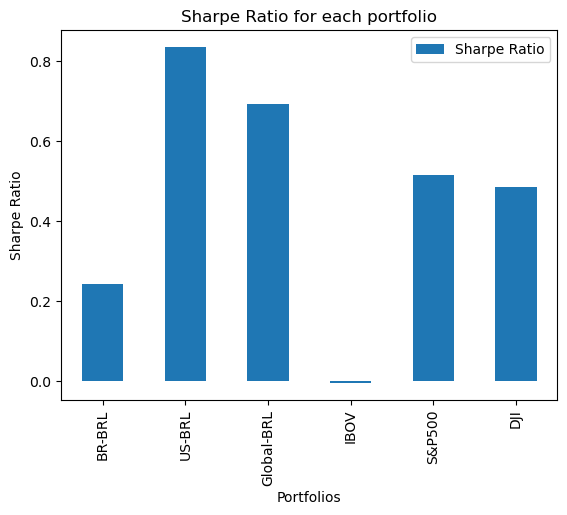

In [30]:
# Plotting all the results obtained by this model

results = pd.DataFrame({'Portfolio':
                        ['BR-BRL',
                         'US-BRL',
                         'Global-BRL',
                         'IBOV',
                         'S&P500',
                         'DJI'
                        ],
                        'Sharpe Ratio': 
                        [br_portfolio_sr, 
                         us_portfolio_brl_converted_sr,
                         global_portfolio_sr,
                         ibov_sr,
                         sp500_sr,
                         dji_sr
                        ]})

fig = results.plot(kind='bar', x = 'Portfolio', y = 'Sharpe Ratio')
fig.set_xlabel('Portfolios')
fig.set_ylabel('Sharpe Ratio')
fig.set_title('Sharpe Ratio for each portfolio')
fig.legend(loc='best')

plt.show()

# Conclusions

- Global nao foi o melhor, porém existe um risco de investimentos internacionais e legislacao que nao pode ser matematicamente auferido, podendo haver mudancas para investimentos de estrangeiros no pais.
- Carteira global maximiza a relacao de risco e retorno, pois 2 fatores pesam, o proprio retorno da carteira global, aliado a uma valorizacao da moeda estrangeira.
- Alem da maximizacao matematica explicita do risco e do retorno, existe uma reducao implicita do risco da carteira devido ao investimento ser realizado em um pais desenvolvido, que oferece maior seguranca e solidez.
- De um modo geral, comparando-se as carteiras US e Global com os indices, percebe-se que a realizacao do stock picking, modalidade de selecao de ativos individuais para investimento, resulta em um sharp ratio maior. O stock picking deve ser feito de maneira criteriosa, com a selecao de ativos solidos e rentaveis no longo prazo. 
- Relações entre os Sharp Ratios
Portfolio global e o portfolio US foi de -XX%.
Portfolio global e o portfolio BR foi de 187,5%????
Portfolio global e o indice IBOV foi de 187,5%????
Portfolio global e o indice SP500 foi de 187,5%????
Portfolio global e o indice DJI foi de 187,5%????

Isto revela que existe um aumento considerável do retorno em relação ao risco quando se adota um portfolio global, sendo mais impactante manter este portfolio diversificado internacionalmente. Outro ponto a se ressaltar é que o portfolio puramente US possui relação melhor, porém o aumento considerável do risco da legislação estrangeira e demais riscos anteriormente abordados não justifica a adoção deste portfolio, para não-residentes dos USA.
Ademais, percebe-se que, mesmo o risco de investimento em um país subdesenvolvido ser maior, isto não resulta em retornos maiores, visto que a carteira puramente BR e o próprio indice IBOV possuem os menores sharp ratios. 

- Estudos posteriores:
    - Otimizar o portfolio para encontrar o peso ideal para cada ativo dentro desta carteira selecionada
    - Otimizar o portfolio para encontrar o proporção ideal entre o portfolio BR e US para compor o portfolio global


# References

1) https://www.datascience-pm.com/crisp-dm-2/
2) https://www.wallstreetmojo.com/markowitz-model/#h-assumptions
